In [2]:
!pip install pandas

     |████████████████████████████████| 17.7 MB 3.6 MB/s            
     |████████████████████████████████| 17.0 MB 30.0 MB/s            


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [22]:
%matplotlib inline

In [13]:
all_star = pd.read_csv('all_star.csv')
all_star.head()

,player_id,year,game_num,game_id,team_id,league_id,gp,starting_pos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [16]:
appearances = pd.read_csv('appearances.csv')
batting_postseason = pd.read_csv('batting_postseason.csv')
batting = pd.read_csv('batting.csv')
college = pd.read_csv('college.csv')
fielding_outfield = pd.read_csv('fielding_outfield.csv')
fielding_postseason = pd.read_csv('fielding_postseason.csv')
fielding = pd.read_csv('fielding.csv')
hall_of_fame = pd.read_csv('hall_of_fame.csv')
home_game = pd.read_csv('home_game.csv')
manager_award_vote = pd.read_csv('manager_award_vote.csv')
manager_award = pd.read_csv('manager_award.csv')
manager_half = pd.read_csv('manager_half.csv')
manager = pd.read_csv('manager.csv')
park = pd.read_csv('park.csv')
pitching_postseason = pd.read_csv('pitching_postseason.csv')
pitching = pd.read_csv('pitching.csv')
player_award_vote = pd.read_csv('player_award_vote.csv')
player_award = pd.read_csv('player_award.csv')
player_college = pd.read_csv('player_college.csv')
player = pd.read_csv('player.csv')
postseason = pd.read_csv('postseason.csv')
salary = pd.read_csv('salary.csv')
team_franchise = pd.read_csv('team_franchise.csv')
team_half = pd.read_csv('team_half.csv')
team = pd.read_csv('team.csv')

In [17]:
batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [95]:
batting = pd.DataFrame(batting)
print(batting.dtypes)

player_id     object
year           int64
stint          int64
team_id       object
league_id     object
g              int64
ab           float64
r            float64
h            float64
double       float64
triple       float64
hr           float64
rbi          float64
sb           float64
cs           float64
bb           float64
so           float64
ibb          float64
hbp          float64
sh           float64
sf           float64
g_idp        float64
ba           float64
dtype: object


In [35]:
pd.to_datetime(batting.year, format='%Y')

0        1871-01-01
1        1871-01-01
2        1871-01-01
3        1871-01-01
4        1871-01-01
            ...    
101327   2015-01-01
101328   2015-01-01
101329   2015-01-01
101330   2015-01-01
101331   2015-01-01
Name: year, Length: 101332, dtype: datetime64[ns]

In [40]:
plt.style.use('seaborn')

In [43]:
batting.groupby(['year','league_id'])['h'].mean()

year  league_id
1876  NL           43.048387
1877  NL           38.195876
1878  NL           44.237500
1879  NL           48.590551
1880  NL           44.044444
                     ...    
2013  NL           29.668571
2014  AL           28.194370
      NL           29.843251
2015  AL           28.593243
      NL           28.079088
Name: h, Length: 269, dtype: float64

In [44]:
batting.groupby(['year','league_id'])['h'].describe()

count       mean        std  min   25%   50%    75%    max
year league_id                                                            
1876 NL         124.0  43.048387  36.027283  0.0   4.0  42.0  73.00  138.0
1877 NL          97.0  38.195876  32.565204  0.0   4.0  35.0  68.00  103.0
1878 NL          80.0  44.237500  30.026252  0.0  11.0  47.5  65.50  100.0
1879 NL         127.0  48.590551  38.362795  0.0   7.0  47.0  78.50  146.0
1880 NL         135.0  44.044444  37.175435  0.0   7.0  39.0  78.50  126.0
...               ...        ...        ...  ...   ...   ...    ...    ...
2013 NL         700.0  29.668571  47.000945  0.0   0.0   4.0  42.00  199.0
2014 AL         746.0  28.194370  47.736312  0.0   0.0   0.0  39.00  225.0
     NL         689.0  29.843251  47.880044  0.0   0.0   4.0  37.00  184.0
2015 AL         740.0  28.593243  48.561256  0.0   0.0   1.0  41.25  200.0
     NL         746.0  28.079088  46.452463  0.0   0.0   3.0  35.50  205.0

[269 rows x 8 columns]

Text(0.5, 1.0, 'Total Number of Hits per Season by League')

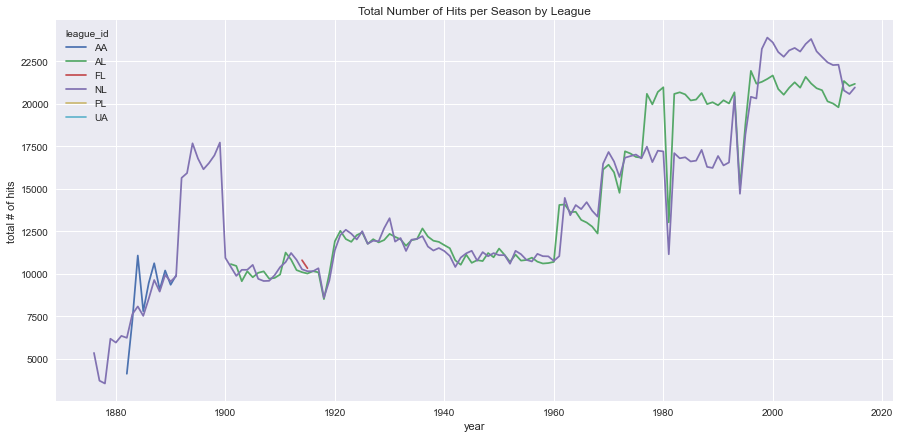

In [90]:
fig,ax = plt.subplots(figsize=(15,7))
batting.groupby(['year','league_id'])['h'].sum().unstack().plot(ax=ax)
ax.set_ylabel('total # of hits')
ax.set_title('Total Number of Hits per Season by League')

In [98]:
batting['ba'] = (batting.h/batting.ab).round(3)

batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,ba
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.271
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,0.292
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,0.331
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,0.325


In [101]:
pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
